In [110]:
import librosa
import statistics
import librosa.display
import numpy as np
import binascii
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
import scipy.signal as signal
from sklearn import svm
from sklearn import ensemble
from sklearn import neural_network
import cv2
import csv
import os
import json

In [98]:
data, rate = librosa.load('videos/1.mp4', sr=None)
display.Audio(data, rate=rate)

In [99]:
data = data[24000:-24000]

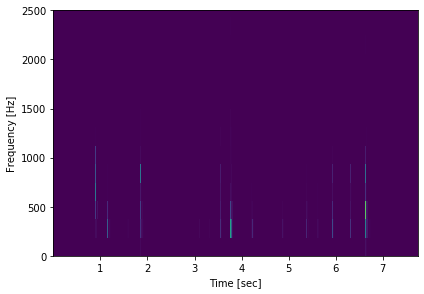

In [100]:
f, t, z = signal.spectrogram(data, rate)
plt.pcolormesh(t, f, z)
plt.ylabel('Frequency [Hz]')
plt.ylim([0,2500])
plt.tight_layout()
plt.xlabel('Time [sec]')
plt.show()

(601, 1241)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223,

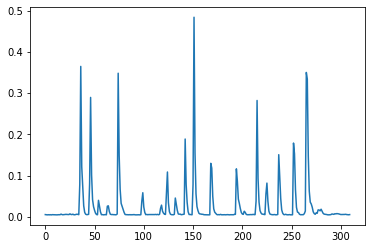

In [101]:
f, t, z = signal.stft(data, fs=48000, window='hann', noverlap = 900, nperseg=1200, return_onesided=True)
print(z.shape)
z = np.abs(z)
frequencies = []
sum_vals = []
zero_indices = []
for idx in range(int(len(t)/4)):
    window_basis = z[:, 4*idx] + z[:, 4*idx + 1] + z[:, 4*idx + 2] + z[:, 4*idx + 3]
    frequencies.append(f[np.argmax(window_basis)])
    sum_vals.append(np.sum(window_basis))
    if np.sum(window_basis) < 0.25:
        zero_indices.append(idx)
    
z = z.T
plt.plot(sum_vals)
print(zero_indices)

In [13]:
data, rate = librosa.load('videos/1.mp4', sr=None)
display.Audio(data, rate=rate)

In [99]:
def extract_key_strokes(file_name, threshold=0.026, nperseg=1200, noverlap=900):
    data, rate = librosa.load(file_name, sr=None)
    # remove first and last bit:
    
    data = data[24000:-24000]

    f, t, z = signal.stft(data, fs=rate, window='hamming', noverlap = noverlap, nperseg=nperseg, return_onesided=True)
    z = np.abs(z)
    frequencies = []
    sum_vals = []
    hits = []
    prev = -1
    for idx in range(int(len(t)/4)):
        window_basis = z[:, 4*idx] + z[:, 4*idx + 1] + z[:, 4*idx + 2] + z[:, 4*idx + 3]
        frequencies.append(f[np.argmax(window_basis)])
        sum_vals.append(np.sum(window_basis))
        if np.sum(window_basis) > threshold:
            if prev == -1:
                prev = idx
        else:
            if prev > -1:
                hits.append((idx + prev + 2) / 2 )
            prev = -1
    if prev > -1:
        hits.append((len(t) + prev + 2) / 2 )

    z = z.T
    #plt.plot(sum_vals)
                     
    hits = np.array(hits)
    hits = ((hits * nperseg) + 24000) / rate
    print(len(hits))
    return hits

In [100]:
test_1 = extract_key_strokes('videos/0.mp4', 0.026, nperseg=1200, noverlap=900)
test_2 = extract_key_strokes('videos/1.mp4', 0.026, nperseg=1200, noverlap=900)
test_3 = extract_key_strokes('videos/2.mp4', 0.026, nperseg=1200, noverlap=900)

14
17
8


In [27]:
print(test_1)

[1.7125 2.     2.2125 2.475  2.6875 2.925  3.175  3.8125 4.3875 4.6
 4.7875 5.0375 5.3625 5.6125]


In [34]:
word_list = []
with open('word_list.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        word_list.append(row[0])
        
word_list = word_list[:3]

In [53]:
test = [test_1, test_2, test_3]
key_mappings = []
for i in range(len(word_list)):
    assert len(test[i]) == len(word_list[i])
    key_mappings.append((test[i], word_list[i]))
    
print(key_mappings)

[(array([1.7125, 2.    , 2.2125, 2.475 , 2.6875, 2.925 , 3.175 , 3.8125,
       4.3875, 4.6   , 4.7875, 5.0375, 5.3625, 5.6125]), 'lunatic fringe'), (array([1.45  , 1.7   , 1.8875, 2.425 , 3.    , 3.4875, 3.6375, 3.85  ,
       4.1125, 4.325 , 4.7625, 5.425 , 5.925 , 6.1625, 6.4875, 6.8625,
       7.225 ]), 'lose your marbles'), (array([3.2625, 3.7625, 4.2125, 4.725 , 5.1625, 5.5625, 6.    , 6.425 ]), 'acronyms')]


In [101]:
def annotate_video(file_path, key_mapping):

    font = cv2.FONT_HERSHEY_SIMPLEX
    bottom_of_screen = (10,400)
    left_of_screen = (10, 200)
    font_scale = 3
    font_color = (255,255,255)
    display_color = (255,0,0)
    line_type = 2
    
    file_name = os.path.basename(file_path)
    cap = cv2.VideoCapture(os.path.join('videos', file_name))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter(os.path.join('annotated', file_name),fourcc, fps, (640,480))

    key_timings = key_mapping[0] * fps
    key_strokes = key_mapping[1]

    print(key_strokes)


    frame_num = 0
    last_key = 0
    cur_word = ''
    while(cap.isOpened()):
        ret, frame = cap.read()

        frame_num += 1

        if not ret:
            break

        #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #frame = cv2.flip(frame,0)
        while frame_num > key_timings[last_key] + 4 and last_key < len(key_strokes) - 1:
            last_key += 1

        if frame_num < key_timings[last_key] + 4 and frame_num > key_timings[last_key] + 2:
            
            key_stroke = key_strokes[last_key].upper()
            cur_word = ''.join(key_strokes[:last_key + 1]).upper()

            if key_stroke == ' ':
                key_stroke = 'space'
            frame = cv2.putText(frame, key_stroke, 
                left_of_screen, 
                font, 
                font_scale,
                display_color,
                line_type)
            
        frame = cv2.putText(frame, cur_word, 
            bottom_of_screen, 
            font, 
            font_scale/2,
            font_color,
            line_type)
            

        #cv2.imshow('frame',frame)

        out.write(frame)


    cap.release()
    out.release()

#cv2.destroyAllWindows()

In [102]:
file_paths = ['videos/0.mp4', 'videos/1.mp4', 'video/2.mp4']
for idx, file in enumerate(file_paths):
    annotate_video(file, key_mappings[idx])

lunatic fringe
lose your marbles
acronyms


In [116]:
print(json.dumps(list(key_mappings[0][0])))

[1.7125, 2.0, 2.2125, 2.475, 2.6875, 2.925, 3.175, 3.8125, 4.3875, 4.6, 4.7875, 5.0375, 5.3625, 5.6125]


In [117]:
with open('train.csv', 'w+') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    for idx, file in enumerate(file_paths):
        row = [idx, file, word_list[idx], json.dumps(list(key_mappings[idx][0]))]
        csv_writer.writerow(row)